In [72]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 4.5 MB/s eta 0:00:00


In [199]:
import re
import nltk
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from unidecode import unidecode
from nltk.tokenize import WordPunctTokenizer
from collections import Counter
from functools import reduce
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
corpus = [
    "este es un ejemplo de lo que es bow",
    "el computador esta en el escritorio",
    "este ejemplo es bastante claro"
]

In [7]:
tokenizer = WordPunctTokenizer()
token_corpus = list(map(tokenizer.tokenize, corpus))
display(token_corpus)

[['este', 'es', 'un', 'ejemplo', 'de', 'lo', 'que', 'es', 'bow'],
 ['el', 'computador', 'esta', 'en', 'el', 'escritorio'],
 ['este', 'ejemplo', 'es', 'bastante', 'claro']]

In [9]:
count_corpus = list(map(Counter, token_corpus))
display(count_corpus)

[Counter({'este': 1,
          'es': 2,
          'un': 1,
          'ejemplo': 1,
          'de': 1,
          'lo': 1,
          'que': 1,
          'bow': 1}),
 Counter({'el': 2, 'computador': 1, 'esta': 1, 'en': 1, 'escritorio': 1}),
 Counter({'este': 1, 'ejemplo': 1, 'es': 1, 'bastante': 1, 'claro': 1})]

In [19]:
x = list(range(10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
reduce(lambda acum, i: acum + i, x, 0)

45

In [27]:
local_vocab = list(map(set, token_corpus))
vocab = list(reduce(lambda a, b: a | b, local_vocab, set()))

In [28]:
local_vocab

[{'bow', 'de', 'ejemplo', 'es', 'este', 'lo', 'que', 'un'},
 {'computador', 'el', 'en', 'escritorio', 'esta'},
 {'bastante', 'claro', 'ejemplo', 'es', 'este'}]

In [29]:
vocab

['este',
 'bastante',
 'de',
 'que',
 'esta',
 'computador',
 'bow',
 'en',
 'claro',
 'un',
 'escritorio',
 'lo',
 'es',
 'ejemplo',
 'el']

In [15]:
{'a', 'b', 'c'} | {'a', 'b', 'd'}

{'a', 'b', 'c', 'd'}

In [32]:
word2int = pd.Series(index=vocab, data=np.arange(len(vocab)))
word2int

este           0
bastante       1
de             2
que            3
esta           4
computador     5
bow            6
en             7
claro          8
un             9
escritorio    10
lo            11
es            12
ejemplo       13
el            14
dtype: int64

In [35]:
word2int["ejemplo"]

13

In [37]:
bow = np.zeros(shape=(len(corpus), word2int.size))
bow

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [39]:
count_corpus

[Counter({'este': 1,
          'es': 2,
          'un': 1,
          'ejemplo': 1,
          'de': 1,
          'lo': 1,
          'que': 1,
          'bow': 1}),
 Counter({'el': 2, 'computador': 1, 'esta': 1, 'en': 1, 'escritorio': 1}),
 Counter({'este': 1, 'ejemplo': 1, 'es': 1, 'bastante': 1, 'claro': 1})]

In [41]:
for i, counts in enumerate(count_corpus):
    keys, values = counts.keys(), counts.values()
    col_index = word2int[list(keys)]
    values = list(values)
    bow[i, col_index] = values

In [42]:
bow

array([[1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 2., 1., 0.],
       [0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 2.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.]])

In [43]:
pd.DataFrame(data=bow, columns=word2int.index)

,este,bastante,de,que,esta,computador,bow,en,claro,un,escritorio,lo,es,ejemplo,el
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [45]:
CountVectorizer?

In [46]:
corpus

['este es un ejemplo de lo que es bow',
 'el computador esta en el escritorio',
 'este ejemplo es bastante claro']

In [48]:
vectorizer = CountVectorizer().fit(corpus)

In [51]:
counts = vectorizer.transform(corpus).toarray()

In [54]:
counts

array([[0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]])

In [53]:
pd.DataFrame(data=counts, columns=vectorizer.get_feature_names_out())

,bastante,bow,claro,computador,de,ejemplo,el,en,es,escritorio,esta,este,lo,que,un
0,0,1,0,0,1,1,0,0,2,0,0,1,1,1,1
1,0,0,0,1,0,0,2,1,0,1,1,0,0,0,0
2,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0


In [55]:
%%shell
unzip data.zip

Archive:  data.zip
  inflating: reviews_data.csv        


In [66]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [86]:
nlp = spacy.load("en_core_web_sm")
sc_pat = re.compile(r"[^a-z]")
spa_pat = re.compile(r"\s+")

In [87]:
def preprocess(text: str) -> str:
    doc = nlp(text)
    valid_tokens = filter(lambda token: not token.is_stop, doc)
    lemmas = map(lambda token: token.lemma_, valid_tokens)
    lemmas_text = " ".join(lemmas)
    lower_text = lemmas_text.lower()
    norm_text = unidecode(lower_text)
    clean_text = re.sub(sc_pat, " ", norm_text)
    spaces_text = re.sub(spa_pat, " ", clean_text)
    return spaces_text

In [90]:
df = (
    pd.read_csv("reviews_data.csv")
    .filter(["Rating", "Review"])
    .rename(columns={"Rating": "rating", "Review": "review"})
    .dropna()
    .assign(preprocess_text = lambda df: df.review.apply(preprocess))
)

In [91]:
preprocess(df.review.iloc[0])

'amber ladonna starbucks southwest parkway warm welcoming smile voice greet drive customer service spot order right smile actually star available '

In [92]:
df

,rating,review,preprocess_text
0,5.0,Amber and LaDonna at the Starbucks on Southwes...,amber ladonna starbucks southwest parkway warm...
1,5.0,** at the Starbucks by the fire station on 436...,starbucks fire station altamonte springs fl d...
2,5.0,I just wanted to go out of my way to recognize...,want way recognize starbucks employee billy fr...
3,5.0,Me and my friend were at Starbucks and my card...,friend starbucks card work thankful worker pay...
4,5.0,I’m on this kick of drinking 5 cups of warm wa...,kick drink cup warm water work instacart right...
...,...,...,...
700,1.0,I ordered Via Starbucks coffee online. I recei...,order starbucks coffee online receive email st...
701,3.0,"My name is Ric **, I am journalist by professi...",ric journalist profession send letter starbuck...
702,1.0,"The bagel was ice cold, not cut and not toasted.",bagel ice cold cut toast
703,1.0,"In the morning of Monday, August 15, 2011, at ...",morning monday august co worker stop starbucks...


In [105]:
vect = CountVectorizer(max_df=0.8, min_df=3, max_features=1000).fit(df.preprocess_text)

In [106]:
bow = vect.transform(df.preprocess_text)

In [107]:
bow

<705x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 17371 stored elements in Compressed Sparse Row format>

In [113]:
freqs = np.array(bow.sum(axis=0)).flatten()

In [116]:
freqs_dict = dict(zip(vect.get_feature_names_out(), freqs))
freqs_dict

{'able': 25,
 'absolutely': 9,
 'accept': 8,
 'acceptable': 4,
 'access': 6,
 'accidentally': 7,
 'accommodate': 5,
 'accord': 4,
 'account': 48,
 'acknowledge': 5,
 'act': 11,
 'action': 6,
 'actually': 21,
 'ad': 4,
 'add': 36,
 'addition': 4,
 'additional': 5,
 'address': 16,
 'advantage': 6,
 'advise': 7,
 'afternoon': 7,
 'age': 6,
 'agent': 4,
 'ago': 28,
 'agree': 9,
 'air': 4,
 'airport': 6,
 'allow': 12,
 'alternative': 4,
 'amazing': 7,
 'ambiance': 5,
 'americano': 10,
 'angeles': 4,
 'angry': 9,
 'answer': 17,
 'anymore': 24,
 'apologize': 17,
 'apology': 9,
 'app': 34,
 'apparently': 8,
 'appear': 4,
 'apple': 6,
 'appointment': 4,
 'appreciate': 10,
 'approach': 7,
 'approx': 5,
 'april': 10,
 'area': 20,
 'arrive': 11,
 'asian': 4,
 'aside': 4,
 'ask': 190,
 'associate': 7,
 'assume': 7,
 'atmosphere': 10,
 'attach': 5,
 'attempt': 12,
 'attention': 13,
 'attitude': 24,
 'august': 5,
 'automate': 4,
 'available': 13,
 'ave': 15,
 'average': 4,
 'avoid': 8,
 'aware': 4,
 

In [117]:
wc = WordCloud(background_color="white").generate_from_frequencies(freqs_dict)

(-0.5, 399.5, 199.5, -0.5)

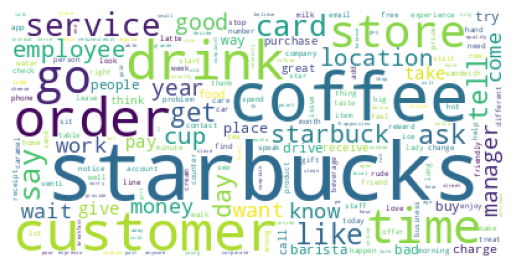

In [119]:
fig, ax = plt.subplots()
ax.imshow(wc)
ax.axis("off")

term frequency inverse document frequency (TF-IDF)

$$
\text{TFIDF}(d_i, t_j) = \text{TF}(d_i, t_j) \cdot w_j\\
w_j = 1 + \log{\frac{n}{1 + \text{DF}(t_j)}}
$$

- $d_i$: documento del corpus.
- $t_j$: termino del vocabulario.
- $\text{TFIDF}$: term frequency inverse document frequency.
- $\text{TF}$: term frequency (bolsa de palabras - bow).
- $n$: numero de documentos.
- $\text{DF}$: document frequency - frecuencia de documento.

In [124]:
df

,rating,review,preprocess_text
0,5.0,Amber and LaDonna at the Starbucks on Southwes...,amber ladonna starbucks southwest parkway warm...
1,5.0,** at the Starbucks by the fire station on 436...,starbucks fire station altamonte springs fl d...
2,5.0,I just wanted to go out of my way to recognize...,want way recognize starbucks employee billy fr...
3,5.0,Me and my friend were at Starbucks and my card...,friend starbucks card work thankful worker pay...
4,5.0,I’m on this kick of drinking 5 cups of warm wa...,kick drink cup warm water work instacart right...
...,...,...,...
700,1.0,I ordered Via Starbucks coffee online. I recei...,order starbucks coffee online receive email st...
701,3.0,"My name is Ric **, I am journalist by professi...",ric journalist profession send letter starbuck...
702,1.0,"The bagel was ice cold, not cut and not toasted.",bagel ice cold cut toast
703,1.0,"In the morning of Monday, August 15, 2011, at ...",morning monday august co worker stop starbucks...


In [162]:
vectorizer = (
    TfidfVectorizer(
        min_df=3,
        max_df=0.8,
        max_features=1000,
        sublinear_tf=True,
        #use_idf=False,
        norm=None,
        )
    .fit(df.preprocess_text)
)

In [163]:
tfidf = vectorizer.transform(df.preprocess_text)

In [164]:
freqs = np.array(tfidf.sum(axis=0)).flatten()
freqs_dict = dict(zip(vectorizer.get_feature_names_out(), freqs))
freqs_dict

{'able': 106.85004623596791,
 'absolutely': 47.313271300492765,
 'accept': 42.89912528125619,
 'acceptable': 22.798982589270093,
 'access': 32.83725180497537,
 'accidentally': 36.835224768624805,
 'accommodate': 27.925057936933026,
 'accord': 23.800709300236566,
 'account': 169.19321254142054,
 'acknowledge': 28.839278841325935,
 'act': 55.82179446475767,
 'action': 32.83725180497537,
 'actually': 93.43147983952332,
 'ad': 22.798982589270096,
 'add': 138.74309258473178,
 'addition': 23.800709300236566,
 'additional': 28.839278841325935,
 'address': 72.78370902773915,
 'advantage': 33.68223053062757,
 'advise': 38.36121587069384,
 'afternoon': 37.573354385173346,
 'age': 27.078002549420134,
 'agent': 23.800709300236566,
 'ago': 115.54247697378672,
 'agree': 46.61605124840501,
 'air': 23.800709300236566,
 'airport': 32.04940657362949,
 'allow': 59.93599056038045,
 'alternative': 23.800709300236566,
 'amazing': 37.573354385173346,
 'ambiance': 28.839278841325935,
 'americano': 50.95716692

In [165]:
wc = WordCloud(background_color="white").generate_from_frequencies(freqs_dict)

(-0.5, 399.5, 199.5, -0.5)

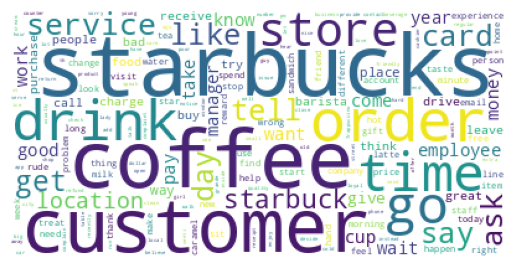

In [166]:
fig, ax = plt.subplots()
ax.imshow(wc)
ax.axis("off")

In [167]:
corpus_test = [
    "nuevo en america",
    "soy nuevo aqui pero america es un gran lugar para vivir",
    "la espectrometria es algo nuevo e indispensable"
]

In [168]:
vect = TfidfVectorizer(norm=None).fit(corpus_test)
features = vect.transform(corpus_test).toarray()

In [170]:
features.shape

(3, 16)

$$
d(\mathbf{x}, \mathbf{y}) = || x - y || = \sqrt{\sum (x_i - y_i) ^ 2}
$$

In [171]:
x = np.array([1.0, 1.0])
y = np.array([2.0, 3.0])

In [175]:
np.sqrt(((x - y) ** 2).sum())

2.23606797749979

In [177]:
np.linalg.norm(x - y)

2.23606797749979

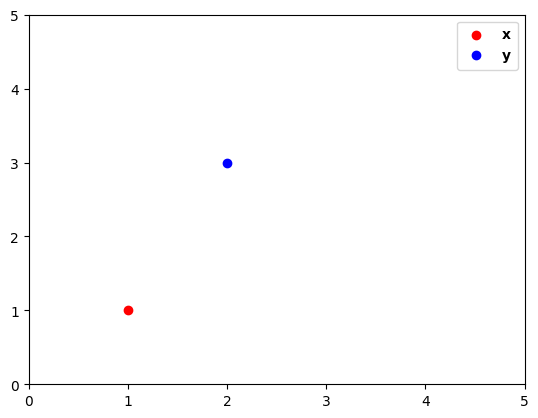

In [176]:
fig, ax = plt.subplots()
ax.scatter(x[0], x[1], c="r", label=r"$\mathbf{x}$")
ax.scatter(y[0], y[1], c="b", label=r"$\mathbf{y}$")
ax.set(xlim=[0, 5])
ax.set(ylim=[0, 5])
ax.legend()

In [180]:
corpus_test

['nuevo en america',
 'soy nuevo aqui pero america es un gran lugar para vivir',
 'la espectrometria es algo nuevo e indispensable']

In [178]:
np.linalg.norm(features[0] - features[1])

5.240119416106521

In [179]:
np.linalg.norm(features[0] - features[2])

4.201188773980276

$$
\cos{\theta} = \frac{\mathbf{x} \cdot \mathbf{y}}{||\mathbf{x}|| \cdot || \mathbf{y} ||}
$$

In [181]:
def cosine(x, y):
    return (x @ y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [184]:
corpus_test

['nuevo en america',
 'soy nuevo aqui pero america es un gran lugar para vivir',
 'la espectrometria es algo nuevo e indispensable']

In [182]:
cosine(features[0], features[1])

0.21663529244619756

In [183]:
cosine(features[0], features[2])

0.11319907547001144

In [185]:
df

,rating,review,preprocess_text
0,5.0,Amber and LaDonna at the Starbucks on Southwes...,amber ladonna starbucks southwest parkway warm...
1,5.0,** at the Starbucks by the fire station on 436...,starbucks fire station altamonte springs fl d...
2,5.0,I just wanted to go out of my way to recognize...,want way recognize starbucks employee billy fr...
3,5.0,Me and my friend were at Starbucks and my card...,friend starbucks card work thankful worker pay...
4,5.0,I’m on this kick of drinking 5 cups of warm wa...,kick drink cup warm water work instacart right...
...,...,...,...
700,1.0,I ordered Via Starbucks coffee online. I recei...,order starbucks coffee online receive email st...
701,3.0,"My name is Ric **, I am journalist by professi...",ric journalist profession send letter starbuck...
702,1.0,"The bagel was ice cold, not cut and not toasted.",bagel ice cold cut toast
703,1.0,"In the morning of Monday, August 15, 2011, at ...",morning monday august co worker stop starbucks...


In [186]:
vect = (
    TfidfVectorizer(
        sublinear_tf=True, min_df=3, max_df=.8, max_features=1000
        )
    .fit(df.preprocess_text)
)

In [189]:
features = (
    vect
    .transform(df.preprocess_text)
    .toarray()
)

In [190]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [193]:
query = df.review.iloc[3]
query

'Me and my friend were at Starbucks and my card didn’t work. Thankful the worker there, paid for our drinks. And was very nice about it, it didn’t seem to bother him that he paid for our drinks. This made my day, but made me look like a fool because my card didn’t work. All thanks to Dillon. At Shoreline WA in Safeway. Thank you so much Dillon for the help, support and, kindness. I rate this 1000/10 if I could but, other than that, 10/10.'

In [194]:
preprocess_query = preprocess(query)

In [195]:
preprocess_query

'friend starbucks card work thankful worker pay drink nice bother pay drink day look like fool card work thank dillon shoreline wa safeway thank dillon help support kindness rate '

In [197]:
query_vector = vect.transform([preprocess_query]).toarray()

In [198]:
query_vector

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [202]:
sims = cosine_similarity(query_vector, features).flatten()

In [203]:
sims.shape

(705,)

In [208]:
df_sims = (
    df
    .assign(similarity=sims)
    .drop(columns="preprocess_text")
    .sort_values(by="similarity", ascending=False)
    .head(5)
)
df_sims

,rating,review,similarity
3,5.0,Me and my friend were at Starbucks and my card...,1.000000
111,5.0,I am thanking for their staff for their suppor...,0.307309
642,1.0,"Starbucks in Safeway Bend - I was in Safeway, ...",0.253852
283,5.0,I Go to the Starbucks in Newnan Georgia (#8569...,0.240302
674,2.0,"I work as a Starbucks, Safeway employee; and I...",0.238837


In [209]:
!pip install rank-bm25

In [210]:
from rank_bm25 import BM25Okapi

In [211]:
corpus_bm25 = df.preprocess_text.to_list()
corpus_bm25[:10]

['amber ladonna starbucks southwest parkway warm welcoming smile voice greet drive customer service spot order right smile actually star available ',
 ' starbucks fire station altamonte springs fl day finally help figure way drink love take time talk minute experience well appreciated bad experience starbucks close work building drink great great customer service specific barista niko refreshing speak pleasant drink perfect store ',
 'want way recognize starbucks employee billy franklin park location run late work place order wrong location order smile second thank soo have bad morning people like world well place ',
 'friend starbucks card work thankful worker pay drink nice bother pay drink day look like fool card work thank dillon shoreline wa safeway thank dillon help support kindness rate ',
 'kick drink cup warm water work instacart right location starbucks give free hot water ask charge appreciate starbucks give opportunity thing star fully support super nice professional coffee

In [212]:
tokens = list(map(lambda doc: doc.split(" "), corpus_bm25))

In [213]:
rank = BM25Okapi(tokens)
rank

In [215]:
query_tokens = preprocess_query.split(" ")
query_tokens

['friend',
 'starbucks',
 'card',
 'work',
 'thankful',
 'worker',
 'pay',
 'drink',
 'nice',
 'bother',
 'pay',
 'drink',
 'day',
 'look',
 'like',
 'fool',
 'card',
 'work',
 'thank',
 'dillon',
 'shoreline',
 'wa',
 'safeway',
 'thank',
 'dillon',
 'help',
 'support',
 'kindness',
 'rate',
 '']

In [216]:
scores = rank.get_scores(query_tokens)

In [217]:
scores

array([  3.45486316,  15.07454715,  15.21814339, 121.42414028,
        18.32335692,   1.65435505,   5.72973449,  11.1378554 ,
         9.65629326,   5.96199183,   9.27154331,   8.5375899 ,
         3.23923152,  13.99144517,   8.03696505,  10.4786531 ,
         3.23923152,   5.05052773,  10.01157152,   7.05679979,
         1.1860593 ,   9.50289578,  22.90179732,   6.0234421 ,
         1.67801709,   8.3888218 ,   2.67554002,   7.25878906,
         7.74956341,   6.36248516,   8.7601157 ,  10.05531014,
         9.38877175,   8.76520551,   3.3087101 ,   3.53373721,
         4.69951516,   1.60897804,   6.26356373,  10.60560239,
         4.55035409,   7.84462057,   2.93608895,   8.23290525,
         1.83553795,   5.98650857,   6.09564583,   9.75006169,
         3.45486316,   6.63262382,   3.1669971 ,   3.35603418,
         3.70832066,   4.18944513,   7.3560666 ,   1.67801709,
         3.45486316,   5.53959781,   4.76322317,   4.49977961,
         6.75414961,   8.68547688,   0.        ,   7.81

In [218]:
df_sims = (
    df
    .assign(similarity=scores)
    .drop(columns="preprocess_text")
    .sort_values(by="similarity", ascending=False)
    .head(5)
)
df_sims

,rating,review,similarity
3,5.0,Me and my friend were at Starbucks and my card...,121.424140
425,1.0,Today is 05/29/2016. I would like to make a co...,25.601540
642,1.0,"Starbucks in Safeway Bend - I was in Safeway, ...",24.740309
22,1.0,I received a gift card on 4/20/2023 but not ab...,22.901797
111,5.0,I am thanking for their staff for their suppor...,21.914717


In [219]:
rank.get_top_n(query_tokens, corpus_bm25, n=5)

['friend starbucks card work thankful worker pay drink nice bother pay drink day look like fool card work thank dillon shoreline wa safeway thank dillon help support kindness rate ',
 'today like complaint starbucks shift date time cheat change money day worker tell policy manager supervisor name able refill lemonade inside tea particular location south la brea ave los angeles telephone pay fee new customer worker work today shift good worker worker currently supervise dance work treat client inappropriately refill say company policy like lie starbucks allow refill thank restroom need clean urine toilet thank ',
 'starbuck safeway bend safeway franklin get coffee starbucks week person serve coffee girl talk customer pay notice person come want coffee get sick wait walk end young lady work rude like take care soon possible thank ',
 'receive gift card able use today believe purchase starbucks gift card anymore nd time able use starbucks gift card time thank card coordinator church foste